In [56]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [57]:
#Load and Inspect Dataset
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [58]:
#Split Data into Training and Validation Sets
df_test = pd.read_csv('california_housing_test.csv')

X_train = df.drop('median_house_value', axis=1).values
y_train = df['median_house_value'].values

X_test = df_test.drop('median_house_value', axis=1).values
y_test = df_test['median_house_value'].values

In [59]:
# Standardize Features (Zero Mean, Unit Variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
#Add Intercept (Bias) Column to Design Matrix
X_train_bias = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_bias = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])


In [62]:
#Implement Linear Regression using Normal
# Normal Equation: theta = (X^T X)^(-1) X^T y
XtX = X_train_bias.T @ X_train_bias
XtX_inv = np.linalg.inv(XtX)
XtY = X_train_bias.T @ y_train
theta_normal = XtX_inv @ XtY
theta_normal[:8]

array([207300.91235294, -86499.60728226, -91744.05083061,  14483.29860201,
       -18263.60700749,  49587.33777166, -44178.15153005,  17470.57604338])

In [61]:
#Predict and Evaluate on Validation Set (Normal Equation)
y_pred_normal = X_test_bias @ theta_normal

mse_normal = mean_squared_error(y_test, y_pred_normal)
rmse_normal = np.sqrt(mse_normal)
r2_normal = r2_score(y_test, y_pred_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)

print(f"Normal Eq - MSE: {mse_normal:.3f}, RMSE: {rmse_normal:.2f}, R2: {r2_normal:.4f}, MAE: {mae_normal:.3f}")

Normal Eq - MSE: 4867205486.929, RMSE: 69765.36, R2: 0.6195, MAE: 50352.228


In [66]:
#Implement Mean Squared Error (MSE) Loss
def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean((y_true - y_pred) ** 2)
def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error between true and predicted values.

    Parameters:
    y_true (np.ndarray): True target values.
    y_pred (np.ndarray): Predicted target values.

    Returns:
    float: Mean Squared Error
    """
    return np.mean((y_true - y_pred) ** 2)
def mse_loss(y_true, y_pred):
    if not isinstance(y_true, np.ndarray) or not isinstance(y_pred, np.ndarray):
        raise TypeError("Inputs must be numpy arrays")
    if y_true.shape != y_pred.shape:
        raise ValueError("Shapes of y_true and y_pred must match")
    return np.mean((y_true - y_pred) ** 2)
def mse_loss(y_true, y_pred):
    if not isinstance(y_true, np.ndarray) or not isinstance(y_pred, np.ndarray):
        raise TypeError("Inputs must be numpy arrays")
    if y_true.shape != y_pred.shape:
        raise ValueError("Shapes of y_true and y_pred must match")
    return np.mean((y_true - y_pred) ** 2)


In [67]:
#Implement Batch Gradient Descent for Linear Regression
alpha = 0.01
n_iter = 2000

# Initialize theta
np.random.seed(42)
theta_gd = np.random.randn(X_train_bias.shape[1])

train_losses = []
val_losses = []

for i in range(n_iter):
    y_pred_train = X_train_bias @ theta_gd
    loss = mse_loss(y_train, y_pred_train)
    train_losses.append(loss)

    # Validation loss
    y_pred_val = X_test_bias @ theta_gd
    val_loss = mse_loss(y_test, y_pred_val)
    val_losses.append(val_loss)

    # Gradient
    grad = (2 / X_train_bias.shape[0]) * (X_train_bias.T @ (y_pred_train - y_train))
    theta_gd -= alpha * grad

    # Optional: Early stopping
    if i > 0 and abs(train_losses[-2] - train_losses[-1]) < 1e-6:
        print(f"Early stopping at iteration {i}")
        break

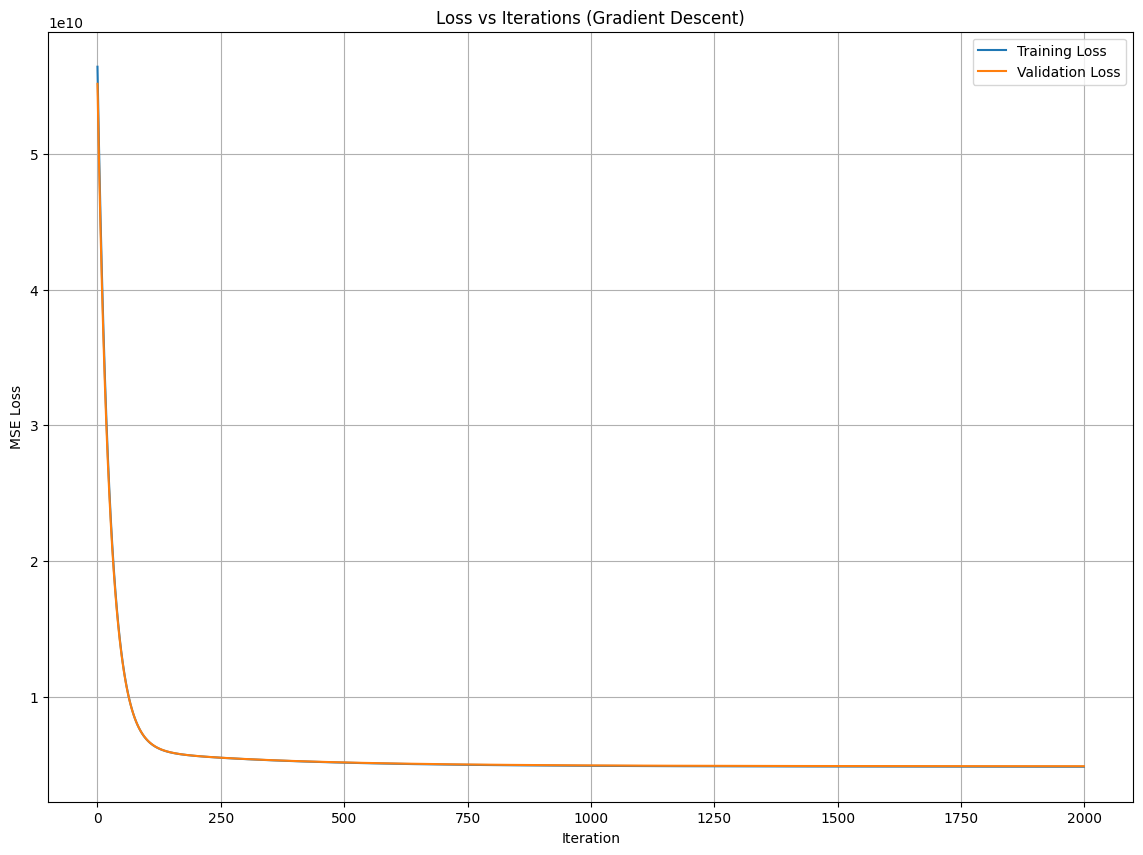

In [65]:
#Track and Plot Training Loss vs Iterations (Gradient Descent)
plt.figure(figsize=(14, 10))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss vs Iterations (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
#Predict and Evaluate on Validation Set (Gradient Descent)
y_pred_gd = X_test_bias @ theta_gd

mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
r2_gd = r2_score(y_test, y_pred_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)

print(f"Gradient Descent - MSE: {mse_gd:.3f}, RMSE: {rmse_gd:.2f}, R2: {r2_gd:.4f}, MAE: {mae_gd:.3f}")


Gradient Descent - MSE: 4871123311.636, RMSE: 69793.43, R2: 0.6192, MAE: 50292.564


In [55]:
#Fit and Evaluate scikit-learn LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_sklearn = lr.predict(X_test_scaled)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

print(f"scikit-learn - MSE: {mse_sklearn:.3f}, RMSE: {rmse_sklearn:.2f}, R2: {r2_sklearn:.4f}, MAE: {mae_sklearn:.3f}")


scikit-learn - MSE: 4867205486.929, RMSE: 69765.36, R2: 0.6195, MAE: 50352.228


In [72]:
#Compare Metrics Across All Methods
results = pd.DataFrame({
    'Method': ['Normal Equation', 'Gradient Descent', 'scikit-learn'],
    'MSE': [round(mse_normal, 4), round(mse_gd, 4), round(mse_sklearn, 4)],
    'RMSE': [round(rmse_normal, 4), round(rmse_gd, 4), round(rmse_sklearn, 4)],
    'R2': [round(r2_normal, 4), round(r2_gd, 4), round(r2_sklearn, 4)],
    'MAE': [round(mae_normal, 4), round(mae_gd, 4), round(mae_sklearn, 4)]
})
results = pd.DataFrame({
    'Method': ['Normal Equation', 'Gradient Descent', 'scikit-learn'],
    'MSE': [mse_normal, mse_gd, mse_sklearn],
    'RMSE': [rmse_normal, rmse_gd, rmse_sklearn],
    'R2': [r2_normal, r2_gd, r2_sklearn],
    'MAE': [mae_normal, mae_gd, mae_sklearn]
})
results

,Method,MSE,RMSE,R2,MAE
0,Normal Equation,4.867205e+09,69765.360222,0.619506,50352.228258
1,Gradient Descent,4.871123e+09,69793.433156,0.619199,50292.564410
2,scikit-learn,4.867205e+09,69765.360222,0.619506,50352.228258


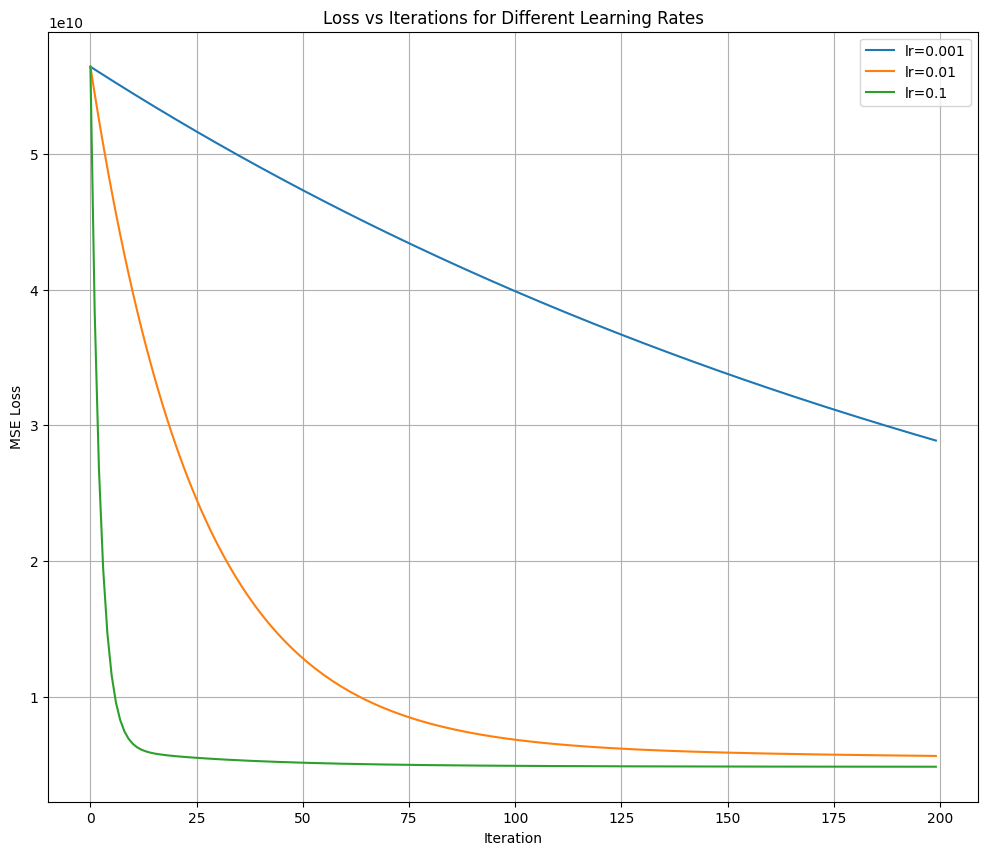

In [77]:
#Plot Loss vs Iterations for Different Learning Rates and Scaling
learning_rates = [0.001, 0.01, 0.1]
plt.figure(figsize=(12,10))
for lr in learning_rates:
    theta = np.random.randn(X_train_bias.shape[1])
    losses = []
    for i in range(200):
        y_pred = X_train_bias @ theta
        loss = mse_loss(y_train, y_pred)
        losses.append(loss)
        grad = (2 / X_train_bias.shape[0]) * (X_train_bias.T @ (y_pred - y_train))
        theta -= lr * grad
    plt.plot(losses, label=f'lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss vs Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

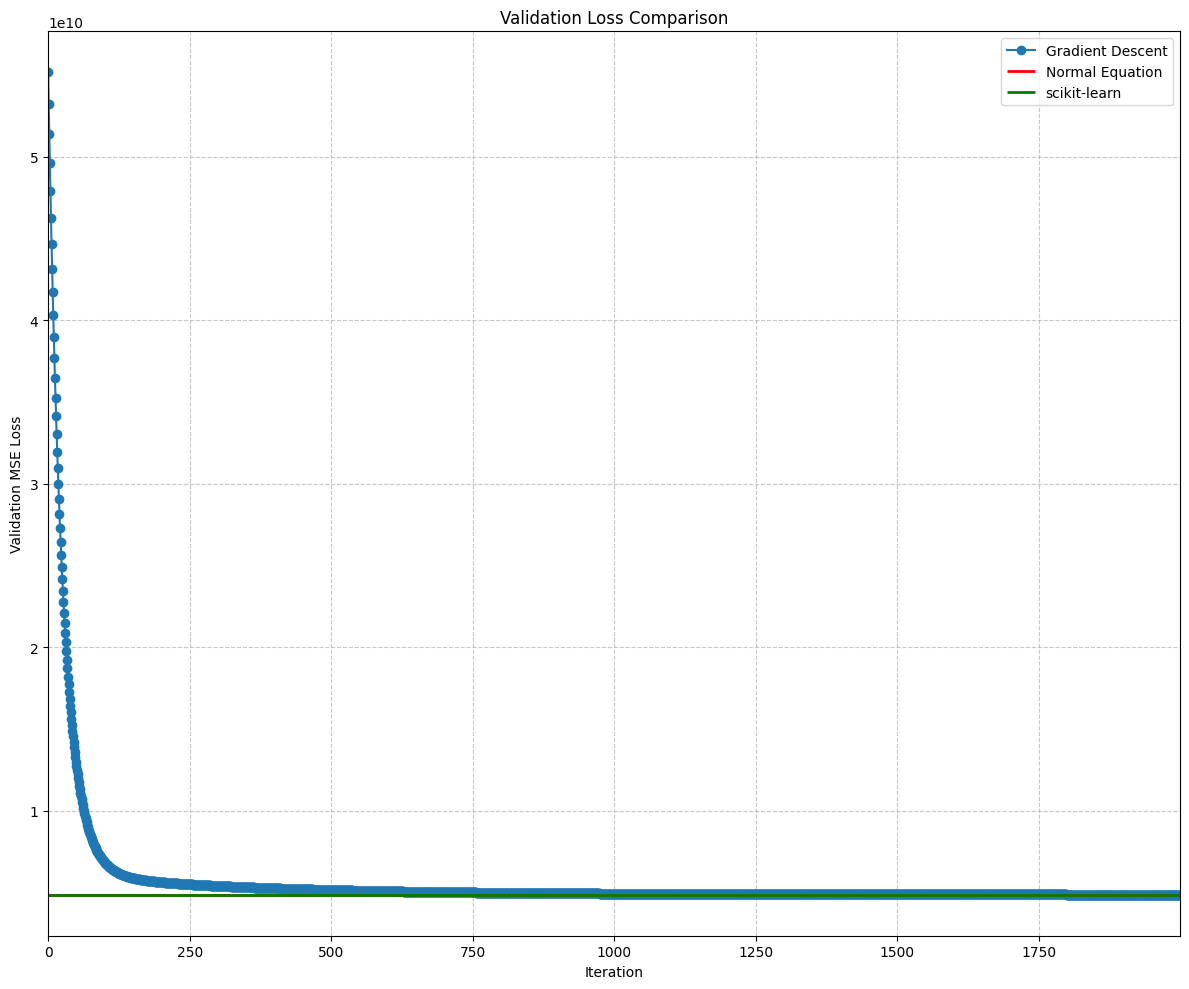

In [78]:
plt.figure(figsize=(12,10))
plt.plot(val_losses, label='Gradient Descent', marker='o', linestyle='-')
plt.hlines(mse_normal, 0, len(val_losses)-1, colors='r', label='Normal Equation', linewidth=2)
plt.hlines(mse_sklearn, 0, len(val_losses)-1, colors='g', label='scikit-learn', linewidth=2)
plt.xlim(0, len(val_losses)-1)
plt.xlabel('Iteration')
plt.ylabel('Validation MSE Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

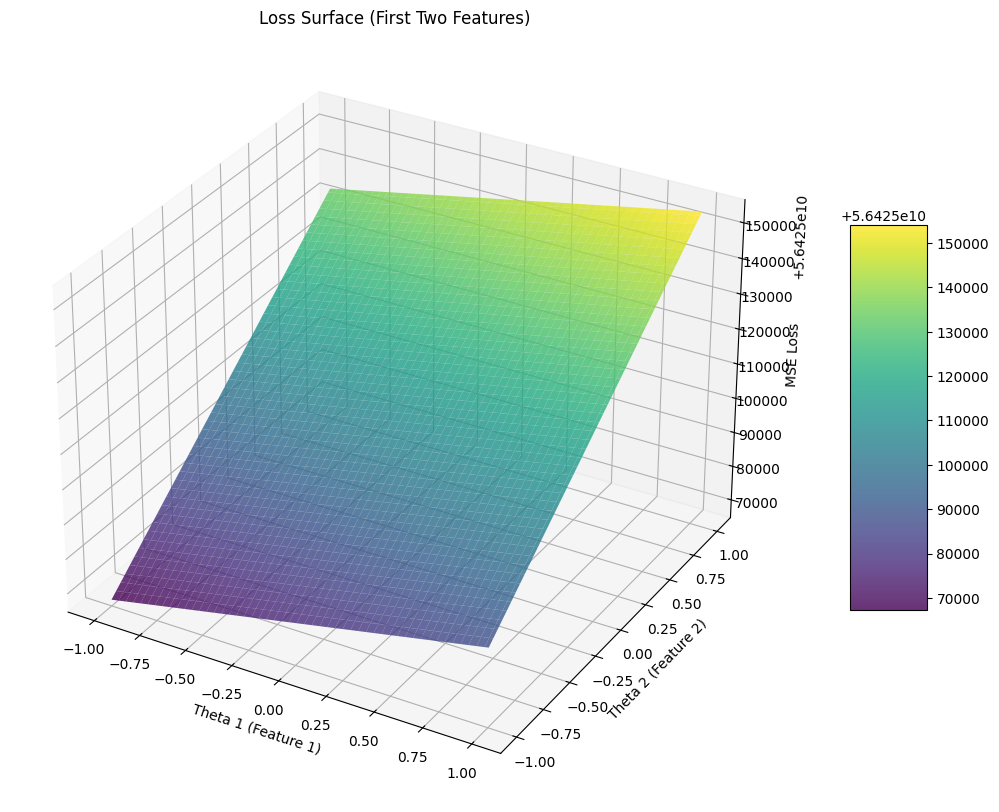

In [87]:
from mpl_toolkits.mplot3d import Axes3D

X_vis = X_train_bias[:, :3]  # bias + first two features

theta_1_range = np.linspace(-1, 1, 100)
theta_2_range = np.linspace(-1, 1, 100)
loss_surface = np.zeros((len(theta_1_range), len(theta_2_range)))

for i, t1 in enumerate(theta_1_range):
    for j, t2 in enumerate(theta_2_range):
        theta_vis = np.array([0, t1, t2])  # bias fixed at 0
        y_pred = X_vis @ theta_vis
        loss_surface[i, j] = mse_loss(y_train, y_pred)

T1, T2 = np.meshgrid(theta_1_range, theta_2_range)
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')  # Change projection to '3d'
surf = ax.plot_surface(T1, T2, loss_surface.T, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta 1 (Feature 1)')
ax.set_ylabel('Theta 2 (Feature 2)')
ax.set_zlabel('MSE Loss')
ax.set_title('Loss Surface (First Two Features)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()